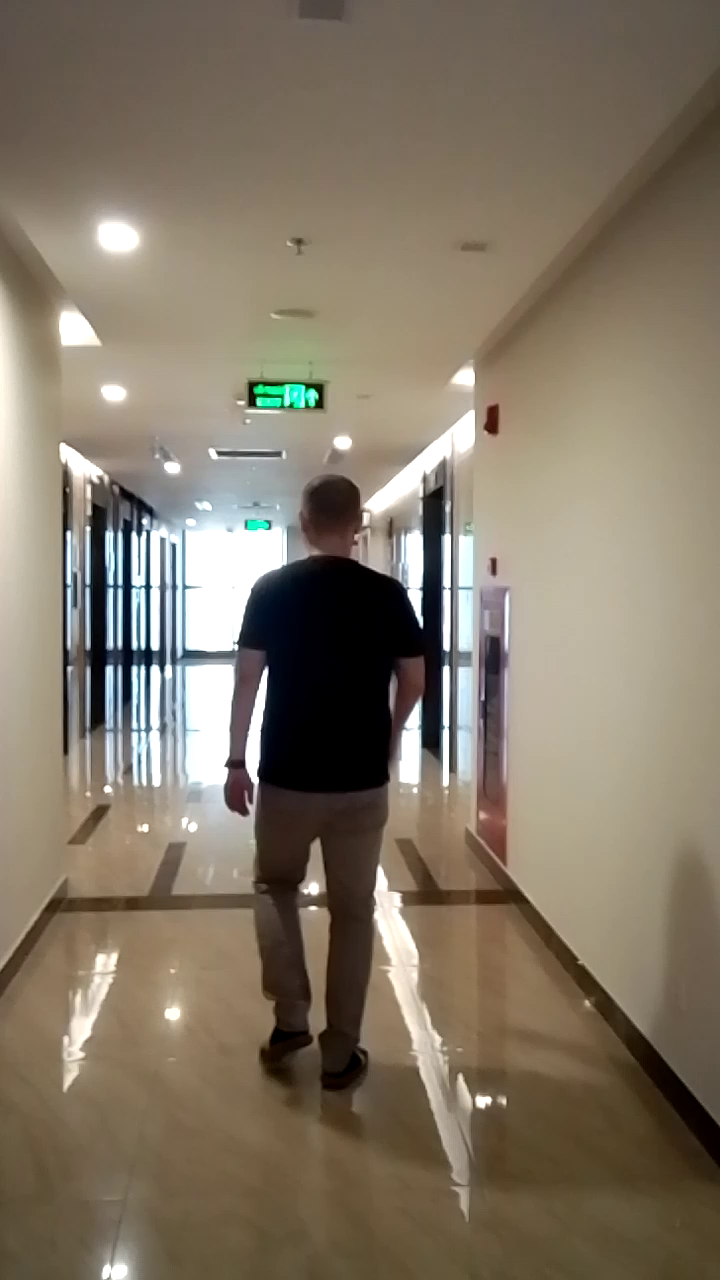

In [4]:
### Load Video and Display first Frame
from torchvision.io import read_video
import random
from torchvision.transforms.functional import to_pil_image

video, audio, meta = read_video("/Users/troydo42/Desktop/Body_Matrixes/samples/man_01.mp4", pts_unit="sec", output_format="TCHW")
fps = meta['video_fps']
frame_count = len(video)
index = random.randrange(frame_count)
sample = to_pil_image(video[index]).rotate(90, expand=True)
sample


In [5]:
### Load Human Segmentation Model
from torchvision.models.detection import MaskRCNN_ResNet50_FPN_V2_Weights, maskrcnn_resnet50_fpn_v2

weights = MaskRCNN_ResNet50_FPN_V2_Weights.COCO_V1
model = maskrcnn_resnet50_fpn_v2(weights=weights)
transforms = weights.transforms()

model.eval().to("cpu")

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         

In [6]:
### Transform Input Image for Inference
input_image = transforms(sample)
input_image

tensor([[[0.3529, 0.3529, 0.3529,  ..., 0.3490, 0.3490, 0.3490],
         [0.3529, 0.3529, 0.3529,  ..., 0.3490, 0.3490, 0.3490],
         [0.3529, 0.3529, 0.3529,  ..., 0.3490, 0.3490, 0.3490],
         ...,
         [0.3176, 0.3216, 0.3255,  ..., 0.3137, 0.3137, 0.3137],
         [0.3176, 0.3216, 0.3255,  ..., 0.3137, 0.3137, 0.3137],
         [0.3176, 0.3216, 0.3255,  ..., 0.3137, 0.3137, 0.3137]],

        [[0.3098, 0.3098, 0.3098,  ..., 0.3098, 0.3098, 0.3098],
         [0.3098, 0.3098, 0.3098,  ..., 0.3098, 0.3098, 0.3098],
         [0.3098, 0.3098, 0.3098,  ..., 0.3098, 0.3098, 0.3098],
         ...,
         [0.2784, 0.2824, 0.2863,  ..., 0.2667, 0.2667, 0.2667],
         [0.2784, 0.2824, 0.2863,  ..., 0.2667, 0.2667, 0.2667],
         [0.2784, 0.2824, 0.2863,  ..., 0.2667, 0.2667, 0.2667]],

        [[0.2824, 0.2824, 0.2824,  ..., 0.2706, 0.2706, 0.2706],
         [0.2824, 0.2824, 0.2824,  ..., 0.2706, 0.2706, 0.2706],
         [0.2824, 0.2824, 0.2824,  ..., 0.2706, 0.2706, 0.

In [7]:
### Run Segmentation Inference on sample frame
predictions = model([input_image.to("cpu")])
predictions

[{'boxes': tensor([[ 220.1816,  469.3691,  421.8909, 1090.3690],
          [ 477.8017,  584.3826,  510.4670,  845.0934],
          [ 244.3383,  379.4460,  328.5993,  412.7296],
          [ 284.4464,  236.3047,  311.4166,  255.5049],
          [ 419.9191,  442.0840,  448.2906,  767.2020],
          [ 245.4882,  381.5761,  324.7064,  410.0662],
          [ 470.9903,  579.4784,  509.0052,  869.0494],
          [ 451.4310,  294.2779,  717.8102, 1143.7845],
          [   0.0000,  218.3923,  714.5396, 1177.5073],
          [ 243.4527,  379.3923,  327.6084,  411.5034]],
         grad_fn=<StackBackward0>),
  'labels': tensor([ 1, 82, 72, 16, 82, 10, 79, 82,  7, 85]),
  'scores': tensor([0.9998, 0.4469, 0.3700, 0.3599, 0.2060, 0.1832, 0.1831, 0.1454, 0.1344,
          0.0973], grad_fn=<IndexBackward0>),
  'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0

In [8]:
### Select Masks and Scores from Predictions
masks = predictions[0]['masks']
scores = predictions[0]['scores']
scores

tensor([0.9998, 0.4469, 0.3700, 0.3599, 0.2060, 0.1832, 0.1831, 0.1454, 0.1344,
        0.0973], grad_fn=<IndexBackward0>)

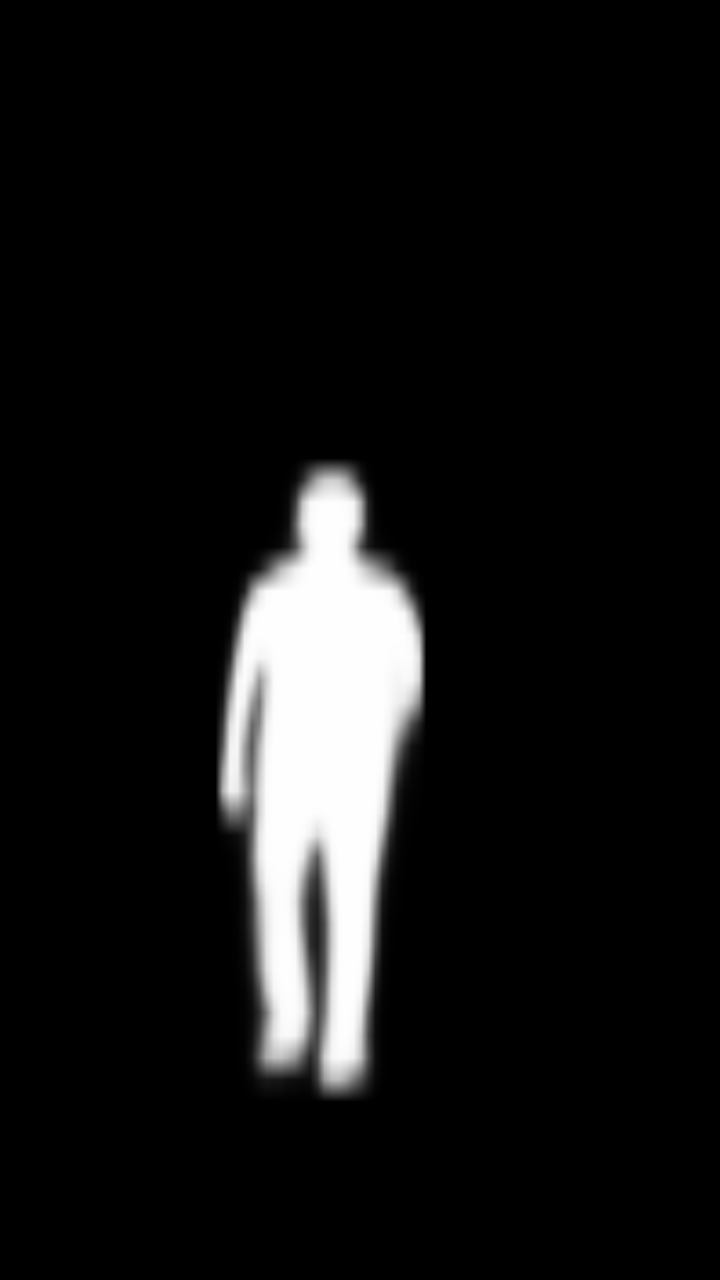

In [9]:
### Filtering for the Main Target
import torch
top = torch.max(scores)
idx = torch.where(scores==top)

mask = torch.squeeze(masks[idx][0], dim=1)
to_pil_image(mask)

In [44]:
import numpy as np

numpy_mask = mask.detach().numpy()
counts, values = np.histogram(numpy_mask, bins=10)
min_counts = np.min(counts)
idx = np.where(counts == min_counts)
threshold = values[idx] 
bool_mask = numpy_mask > threshold
tensor_bool_mask = torch.tensor(bool_mask)
print(tensor_bool_mask, threshold)

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]]) [0.49997965]


In [43]:
print(bool_mask)

[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]]


In [127]:
### Find the Minimum Pixel Threshold for Mask
# import torch

# histogram = torch.histogram(mask, 100)
# dists = histogram.hist
# bins = histogram.bin_edges

# min_value = torch.min(dists)
# idx = torch.where(dists == min_value)
# threshold = bins[idx]

# bool_mask = mask > threshold
# bool_mask

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]])

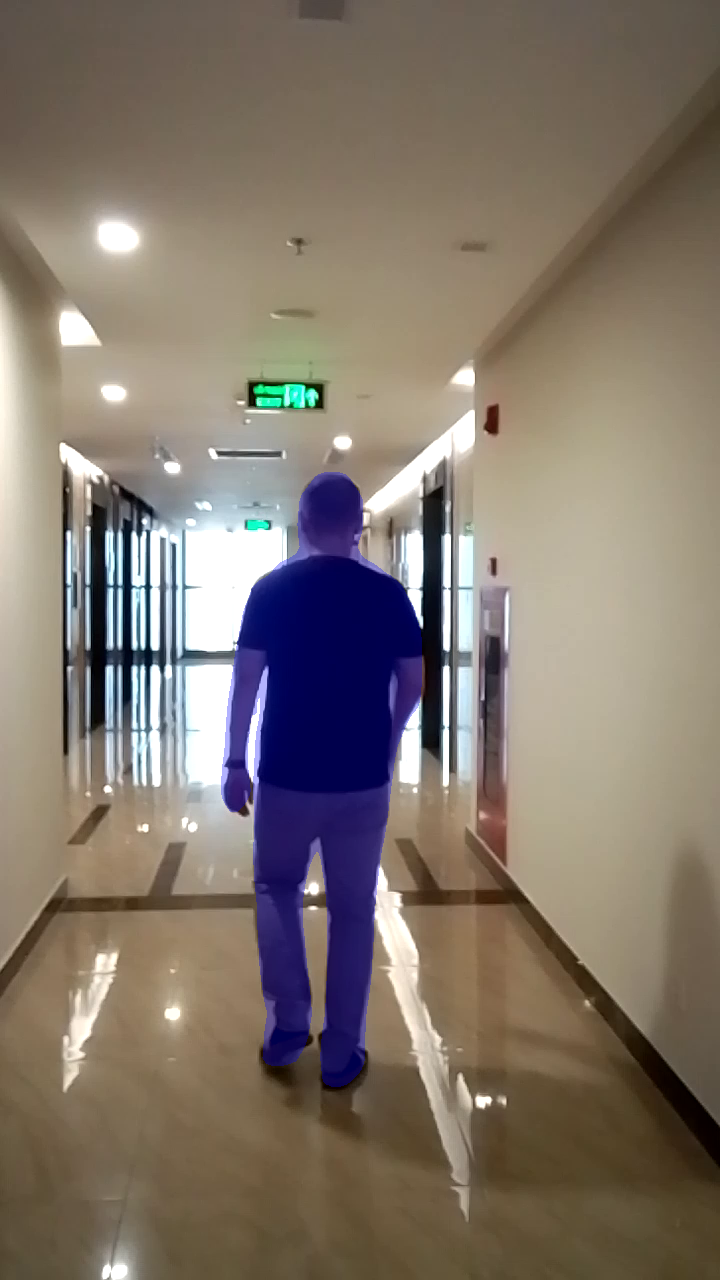

In [45]:
### Drawing Segmantion Mask 
from torchvision.utils import draw_segmentation_masks
from torchvision.transforms.functional import pil_to_tensor

tensor_image = pil_to_tensor(sample)
masked_image = draw_segmentation_masks(tensor_image, tensor_bool_mask, alpha=0.3, colors=["blue"])
to_pil_image(masked_image)
